# Introdução aos métodos discretos

Nome: Yago Pereira dos Anjos Santos

# Lista 3

### 1) Aproximar a função $sen(\pi x)$ por uma função linear contínua por partes, usando a projeção L2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a) Defina a função a ser aproximada: $u(x) = sen(\pi x)$

In [2]:
def u(x):
    return np.sin(np.pi*x)

b) Defina as funções base a nível de elemento

In [3]:
def phi_0(t):
    if -1 <= t <= 1:
        return (1-t) / 2
    else:
        return 0


def phi_1(t):
    if -1 <= t <= 1:
        return (1+t) / 2
    else:
        return 0

c) Construa a matriz de massa usando a quadratura de Gauss com 2 pontos.
Defina a matriz local, que será utilizado para construir a matriz global.

In [4]:
def Matriz(x):
    n = len(x)
    h = x[1] - x[0]
    # matriz global
    M = np.zeros((n,n))
    # matriz local
    Me = np.zeros((2,2))
    # pesos e pontos da Quadratura de Gauss
    w = [1,1]
    t = [-np.sqrt(3)/3, np.sqrt(3)/3]
    
    # Definindo a mtriz local
    Me[0, 0] = (h / 2) * (w[0] * phi_0(t[0])**2 + w[1] * phi_0(t[1])**2)
    Me[0, 1] = (h / 2) * (w[0] * phi_0(t[0]) * phi_1(t[0]) + w[1] * phi_0(t[1]) * phi_1(t[1]))
    Me[1, 0] = (h / 2) * (w[0] * phi_1(t[0]) * phi_0(t[0]) + w[1] * phi_1(t[1]) * phi_0(t[1]))
    Me[1, 1] = (h / 2) * (w[0] * phi_1(t[0])**2 + w[1] * phi_1(t[1])**2)

    # Construção da matriz global
    for i in range(n - 1):
        M[i, i] += Me[0, 0]
        M[i, i+1] += Me[0, 1]
        M[i+1, i] += Me[1, 0]
        M[i+1, i+1] += Me[1, 1]

    return M

d) Construa o vetor de carga usando a quadratura de Gauss com 2 pontos.
Defina o vetor local, que será utilizado para construir vetor global.

In [5]:
def Vetor(x, f):
    n = len(x)
    h = x[1] - x[0]
    b = np.zeros(n)
    be = np.zeros(2)
    w = [1,1]
    t = [-np.sqrt(3)/3, np.sqrt(3)/3]
    
    for i in range(n - 1):
        # Mapeia os pontos de Gauss para o domínio físico [x_i, x_{i+1}]
        x_mapped_t0 = (h/2) * t[0] + (x[i+1] + x[i])/2
        x_mapped_t1 = (h/2) * t[1] + (x[i+1] + x[i])/2
        
        # Definindo o vetor local
        be[0] = (h/2) * (w[0] * f(x_mapped_t0) * phi_0(t[0]) + w[1] * f(x_mapped_t1) * phi_0(t[1]))
        be[1] = (h/2) * (w[0] * f(x_mapped_t0) * phi_1(t[0]) + w[1] * f(x_mapped_t1) * phi_1(t[1]))
        
        # Construindo o vetor global
        b[i] += be[0]
        b[i+1] += be[1]

    return b

e) Plote o gráfico da aproximação para 5, 9, 17, 33 e 65 pontos.

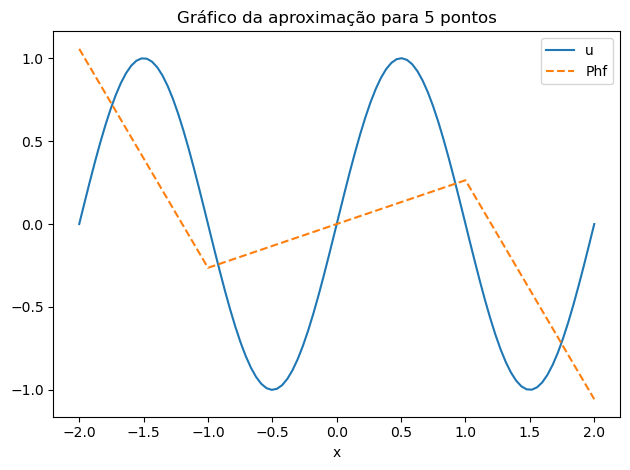

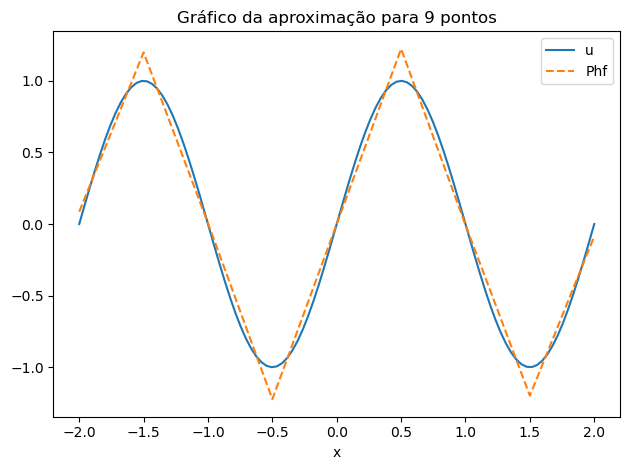

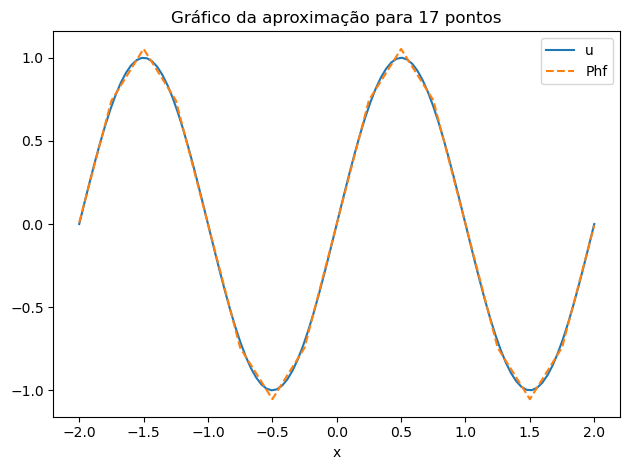

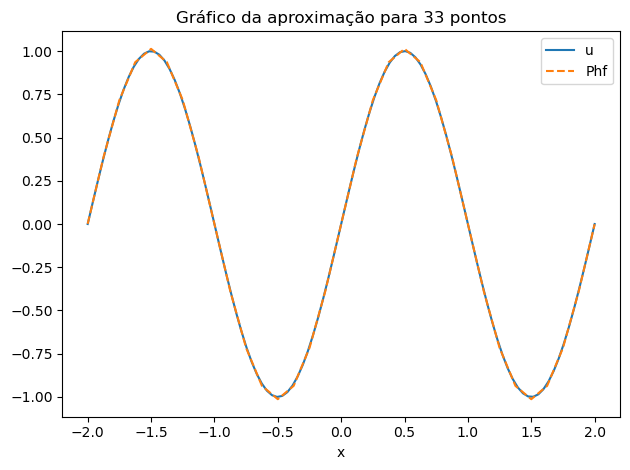

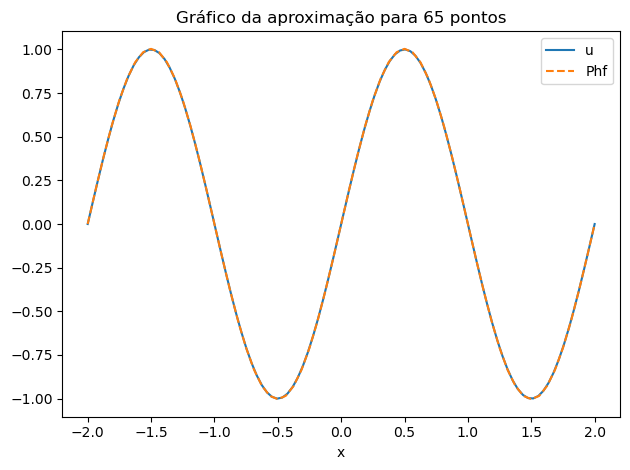

In [6]:
pontos = [5, 9, 17, 33, 65]

for ponto in pontos:
    x = np.linspace(-2, 2, ponto)
    A = Matriz(x)
    b = Vetor(x,u)
    uh = np.linalg.solve(A, b)
    xx = np.linspace(-2, 2, 100)
    plt.plot(xx, u(xx), '-', label = 'u')
    plt.plot(x, uh, '--', label = 'Phf')
    plt.xlabel('x')
    plt.title(f'Gráfico da aproximação para {ponto} pontos')
    plt.legend()
    plt.tight_layout()
    plt.show()